In [14]:
#Importação das bibliotecas utilizadas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
import seaborn as srn
import statistics as sts
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz

In [3]:
#carregamento dos dados
dados = pd.read_csv('/content/drive/MyDrive/star_classification.csv')
dados.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
#Renomeando as colunas para uma melhor localização e entendimento
dados.columns = ['Id', 'Alfa', 'Delta', 'Filtro(U)', 'Filtro(G)', 'Filtro(R)', 'Filtro(I)', 'Filtro(Z)', 'Run(Id)', 'Rereun(Id)', 'Camera(Col.)', 'Campo(Id)', 'Spec.Obj(Id)', 'Classe', 'Redshift', 'Plate', 'MJD', 'Fibra(Id)' ]
dados

,Id,Alfa,Delta,Filtro(U),Filtro(G),Filtro(R),Filtro(I),Filtro(Z),Run(Id),Rereun(Id),Camera(Col.),Campo(Id),Spec.Obj(Id),Classe,Redshift,Plate,MJD,Fibra(Id)
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [5]:
#Exibindo informações gerais sobre os dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            100000 non-null  float64
 1   Alfa          100000 non-null  float64
 2   Delta         100000 non-null  float64
 3   Filtro(U)     100000 non-null  float64
 4   Filtro(G)     100000 non-null  float64
 5   Filtro(R)     100000 non-null  float64
 6   Filtro(I)     100000 non-null  float64
 7   Filtro(Z)     100000 non-null  float64
 8   Run(Id)       100000 non-null  int64  
 9   Rereun(Id)    100000 non-null  int64  
 10  Camera(Col.)  100000 non-null  int64  
 11  Campo(Id)     100000 non-null  int64  
 12  Spec.Obj(Id)  100000 non-null  float64
 13  Classe        100000 non-null  object 
 14  Redshift      100000 non-null  float64
 15  Plate         100000 non-null  int64  
 16  MJD           100000 non-null  int64  
 17  Fibra(Id)     100000 non-null  int64  
dtypes: fl

In [6]:
#Separando uma coluna em uma variavel para realocá-la
classe = dados.iloc[:, 13].values
classe

array(['GALAXY', 'GALAXY', 'GALAXY', ..., 'GALAXY', 'GALAXY', 'GALAXY'],
      dtype=object)

In [7]:
#Inserindo uma nova coluna no final para trabalhar melhor
dados['Classificação'] = classe
dados

,Id,Alfa,Delta,Filtro(U),Filtro(G),Filtro(R),Filtro(I),Filtro(Z),Run(Id),Rereun(Id),Camera(Col.),Campo(Id),Spec.Obj(Id),Classe,Redshift,Plate,MJD,Fibra(Id),Classificação
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171,GALAXY
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427,GALAXY
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299,GALAXY
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775,GALAXY
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842,GALAXY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438,GALAXY
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866,GALAXY
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74,GALAXY
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470,GALAXY


In [8]:
#Deletando a coluna determinada para que não fique duplicada
#Uma vez que a mesma foi inclusa ao final do dataframe
del dados ['Classe']

In [9]:
#Agrupando os dados para vizualização categorica
agrupado = dados.groupby(['Classificação']).size()
agrupado

Classificação
GALAXY    59445
QSO       18961
STAR      21594
dtype: int64

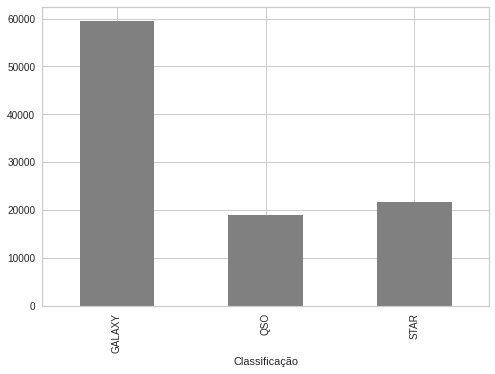

In [10]:
#Vizualização gráfica
agrupado.plot.bar(color = 'gray')

In [11]:
#Verificando se há dados NaN
dados.isnull().sum()

Id               0
Alfa             0
Delta            0
Filtro(U)        0
Filtro(G)        0
Filtro(R)        0
Filtro(I)        0
Filtro(Z)        0
Run(Id)          0
Rereun(Id)       0
Camera(Col.)     0
Campo(Id)        0
Spec.Obj(Id)     0
Redshift         0
Plate            0
MJD              0
Fibra(Id)        0
Classificação    0
dtype: int64

In [12]:
#Separando a classe
previsores = dados.iloc[0:100000, 0:17].values
classe = dados.iloc[0:100000, 17].values

In [13]:
#Dividindo os dados em treino e teste
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split (previsores,
                                                                   classe,
                                                                   test_size = 0.3,
                                                                   random_state = 1)
x_teste

array([[ 1.23765154e+18,  2.29811120e+02,  6.02295960e+01, ...,
         6.98100000e+03,  5.64430000e+04,  7.50000000e+01],
       [ 1.23766555e+18,  2.17870193e+02,  2.33314479e+01, ...,
         2.13200000e+03,  5.34930000e+04,  3.00000000e+01],
       [ 1.23767860e+18,  3.34881121e+02,  1.59957499e+01, ...,
         5.03700000e+03,  5.58230000e+04,  5.17000000e+02],
       ...,
       [ 1.23765295e+18,  4.71866113e+00, -1.05516276e+01, ...,
         1.91200000e+03,  5.32930000e+04,  3.11000000e+02],
       [ 1.23767889e+18,  2.58481985e+01, -1.41456818e+00, ...,
         7.84400000e+03,  5.69820000e+04,  5.04000000e+02],
       [ 1.23767096e+18,  1.40246544e+02,  1.42306717e+01, ...,
         5.30500000e+03,  5.59840000e+04,  1.39000000e+02]])

In [15]:
#Criação e treinamento do modelo
arvore = DecisionTreeClassifier()
arvore.fit(x_treinamento, y_treinamento)

DecisionTreeClassifier()

In [ ]:
#Exportação da arvore para o formato .dot
#Para uma vizualização posterior
export_graphviz(arvore, out_file = 'tree.dot')

In [16]:
#Obtendo as previsões
previsoes = arvore.predict(x_teste)
previsoes

array(['GALAXY', 'GALAXY', 'GALAXY', ..., 'STAR', 'QSO', 'GALAXY'],
      dtype=object)

In [17]:
#Verificando a matriz confusao para comparaçao
#dos resultados apresentados pelo modelo
confusao = confusion_matrix (y_teste, previsoes)
confusao

array([[17308,   487,    26],
       [  471,  5254,     0],
       [   51,     0,  6403]])

In [18]:
#Verificando a eficácia do modelo
taxa_acerto = accuracy_score(y_teste, previsoes)
taxa_acerto

0.9655

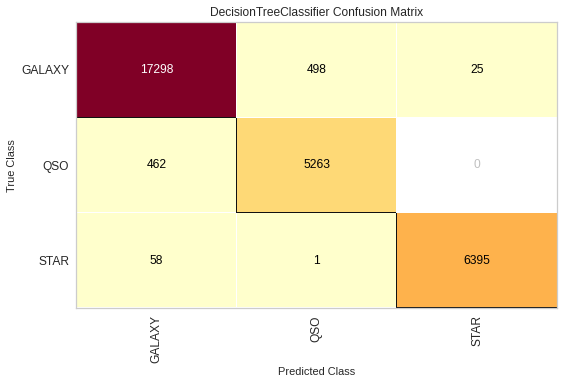

In [19]:
#Vizualizando a matriz confusao para comparação
#entre os valores previstos (em baixo) e os valores
#reais de teste (esquerda) 
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(x_treinamento, y_treinamento)
v.score(x_teste, y_teste)
v.poof()